In [ ]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

In [2]:
AWG_Settings= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':6000000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Measurements\10nano'
}

In [3]:
M8190A = VisaR(AWG_Settings,60000)

In [14]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [4]:
Initialization(M8190A,AWG_Settings)

Instruments Sampling Frecuency set to 6.00000000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [62]:
M8190A.write('SEQ:DEL:ALL')

12

# Pulses Dictionaries

In [5]:
Pump = {
    'Name':'Pump',
    'Amplitude':40,
    'Start time':20,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [6]:
ProbeA = {
    'Name':'ProbeA',
    'Amplitude':25,
    'Start time':0,
    'End time':40,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [7]:
ProbeB = {
    'Name':'ProbeB',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

# Pulse Schemes Dictionaries and measurement path file

In [44]:
PulseScheme_A =  {
    'Name' : 'PulseScheme_A',
    'Pulse Scheme': [Pump,ProbeA],
    'Number of repetitions': 40000,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\TList\10nano'
}

In [45]:
PulseScheme_B  = {
    'Name' : 'PulseScheme_B',
    'Pulse Scheme': [ProbeB,ProbeB],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\TList\10nano'
}

In [10]:
location = PulseScheme_A['Measurement file Path']

# Number of Samples given the AWG Sampling rate and the Reference Signal Frequency
## Sr = 6Ghz for 5 ms

In [11]:
sam = int(6e9*5e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [10]:
sam

30000000

In [25]:
pul2 = Sweep(PulseScheme_B['Pulse Scheme'],10,0,5,sam)

In [18]:
%matplotlib inline

In [16]:
%matplotlib widget 

In [34]:
location = PulseScheme_A['Measurement file Path']

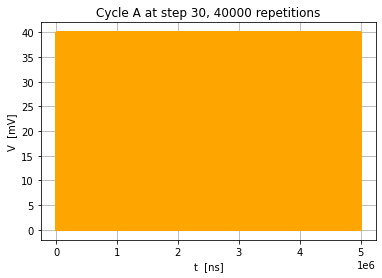

In [46]:
step = 30

pul1 = Sweep_teil(PulseScheme_A,30,step,5000000,sam)

fig,ax= plt.subplots()
ax.grid(True)

#plt.plot(timeMs,dataMs[1]*1000,label= 'Marker Channel {chan}'.format(chan=DAQ_Settings1['Analog Channel Input Marker']),color='purple')
plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel('t  [ns]')
ax.set_title('Cycle A at step {a}, {rep} repetitions'.format(a = step,rep = PulseScheme_A['Number of repetitions'])) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
#fig.savefig(r'{loc}\Cycle A {reps} reps.jpeg'.format(loc =location, reps = PulseScheme_A['Number of repetitions']),bbox_inches='tight')

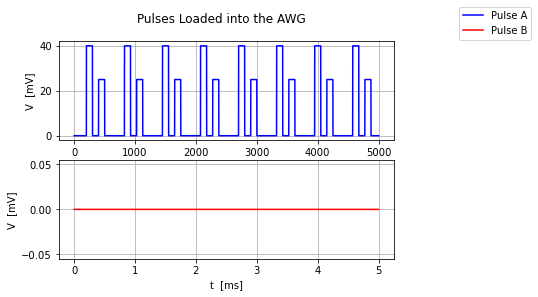

In [26]:
step = 30

#pul1 = Sweep_teil(PulseScheme_AutocorrelationA,30,step,5000,sam)


fig,ax= plt.subplots(2)


ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Pulses Loaded into the AWG')


ax[0].plot(pul1[1],pul1[0],label= 'Pulse A',color='blue')
ax[1].plot(pul2[1],pul2[0],label= 'Pulse B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel(r't  [$\mu$s]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel(r't  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

#fig.savefig('Pulse_scheme_15ms_7500000',optimize=True,bbox_inches='tight')

# Dummy File Loading

In [12]:
M8190A.write('FUNC1:MODE ARB')

Segment_File(M8190A,'D:\\Alejandro\\Pulses\\Dict\\S5\\SegmentB_30000000_0.csv',1)
#M8190A.write('INNIT:IMM')
#time.sleep(5)
#M8190A.write('ABOR')

In [13]:
M8190A.write(':FUNC:MODE STS')

15

In [14]:
M8190A.write('TRAC:DEL:ALL')
M8190A.write('SEQ:DEL:ALL')

12

In [36]:
M8190A.write('SEQ:DEL:ALL')

12

In [47]:
sweeping_run_a = Sweeping_Single_List_File_teil(PulseScheme_A,30,5000000,sam,0,30,AWG_Settings,'A')[0]
#sweeping_runb = Sweeping_Single_List_File_teil(PulseScheme_B,30,5000,sam,0,30,AWG_Settings8,'B')[0]